In [5]:
library(caret)
library(class) #k-nearest neighbors 
library(kknn) #weighted k-nearest neighbors 
library(e1071) #SVM 
library(caret) #select tuning parameters 
library(MASS) # contains the data 
library(reshape2) #assist in creating boxplots 
library(ggplot2) #create boxplots 
library(kernlab) #assist with SVM feature selection



Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'kknn'

The following object is masked from 'package:caret':

    contr.dummy


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [6]:
pima <- rbind(Pima.tr, Pima.te)
pima

npreg,glu,bp,skin,bmi,ped,age,type
5,86,68,28,30.2,0.364,24,No
7,195,70,33,25.1,0.163,55,Yes
5,77,82,41,35.8,0.156,35,No
0,165,76,43,47.9,0.259,26,No
0,107,60,25,26.4,0.133,23,No
5,97,76,27,35.6,0.378,52,Yes
3,83,58,31,34.3,0.336,25,No
1,193,50,16,25.9,0.655,24,No
3,142,80,15,32.4,0.200,63,No
2,128,78,37,43.3,1.224,31,Yes


In [7]:
pima.melt <- melt(pima, id.var = "type")
pima.melt


type,variable,value
No,npreg,5
Yes,npreg,7
No,npreg,5
No,npreg,0
No,npreg,0
Yes,npreg,5
No,npreg,3
No,npreg,1
No,npreg,3
Yes,npreg,2


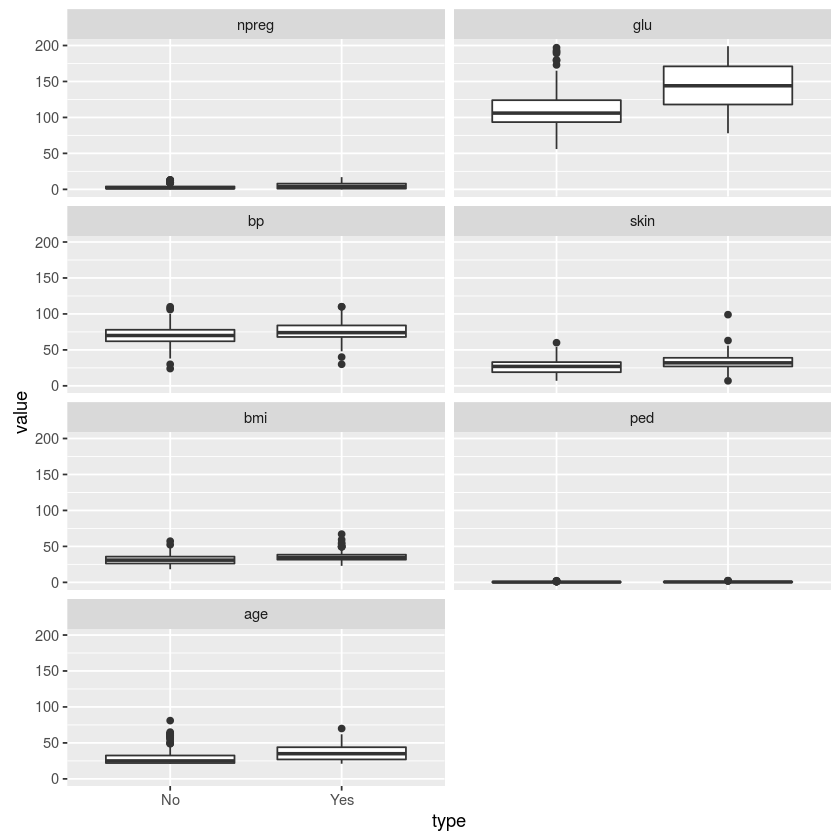

In [8]:
ggplot(data = pima.melt, aes(x = type, y = value)) + geom_boxplot() + facet_wrap(~ variable, ncol = 2)


In [9]:
pima.scale <- data.frame(scale(pima[, -8]))
str(pima.scale)
pima.scale$type <- pima$type
pima.scale.melt <- melt(pima.scale, id.var = "type")


'data.frame':	532 obs. of  7 variables:
 $ npreg: num  0.448 1.052 0.448 -1.062 -1.062 ...
 $ glu  : num  -1.13 2.386 -1.42 1.418 -0.453 ...
 $ bp   : num  -0.285 -0.122 0.852 0.365 -0.935 ...
 $ skin : num  -0.112 0.363 1.123 1.313 -0.397 ...
 $ bmi  : num  -0.391 -1.132 0.423 2.181 -0.943 ...
 $ ped  : num  -0.403 -0.987 -1.007 -0.708 -1.074 ...
 $ age  : num  -0.708 2.173 0.315 -0.522 -0.801 ...


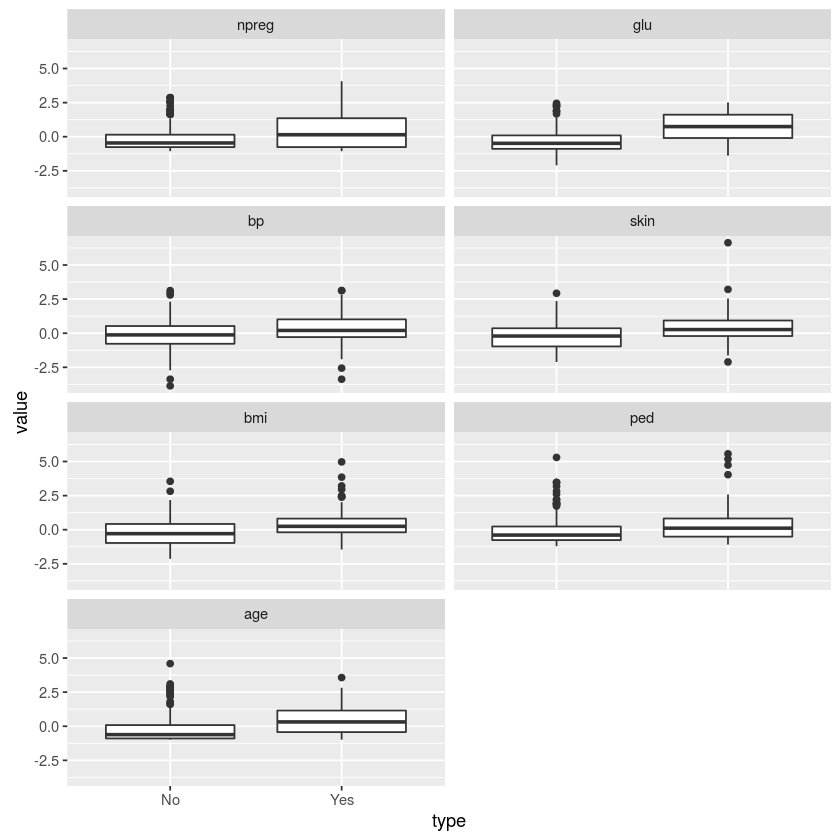

In [10]:
ggplot(data = pima.scale.melt, aes(x = type, y = value)) + geom_boxplot() + facet_wrap(~ variable, ncol = 2)

In [11]:
cor(pima.scale[-8])

,npreg,glu,bp,skin,bmi,ped,age
npreg,1.000000000,0.1253296,0.204663421,0.09508511,0.008576282,0.007435104,0.64074687
glu,0.125329647,1.0000000,0.219177950,0.22659042,0.247079294,0.165817411,0.27890711
bp,0.204663421,0.2191779,1.000000000,0.22607244,0.307356904,0.008047249,0.34693872
skin,0.095085114,0.2265904,0.226072440,1.00000000,0.647422386,0.118635569,0.16133614
bmi,0.008576282,0.2470793,0.307356904,0.64742239,1.000000000,0.151107136,0.07343826
ped,0.007435104,0.1658174,0.008047249,0.11863557,0.151107136,1.000000000,0.07165413
age,0.640746866,0.2789071,0.346938723,0.16133614,0.073438257,0.071654133,1.00000000


In [24]:
table(knn.test, test$type)
#The number of yes=57 and number of No=103.
# ratio of yes: no = 57:103

        
knn.test No Yes
     No  91  27
     Yes 12  27

In [12]:
set.seed(7457)
ind <- sample(2, nrow(pima.scale), replace = TRUE, prob = c(0.7, 
                                                              0.3))
train <- pima.scale[ind == 1, ]
test <- pima.scale[ind == 2, ]
str(train)
str(test)


'data.frame':	375 obs. of  8 variables:
 $ npreg: num  0.448 -1.062 -1.062 0.448 -0.156 ...
 $ glu  : num  -1.42 1.418 -0.453 -0.775 -1.227 ...
 $ bp   : num  0.852 0.365 -0.935 0.365 -1.097 ...
 $ skin : num  1.123 1.313 -0.397 -0.207 0.173 ...
 $ bmi  : num  0.423 2.181 -0.943 0.394 0.205 ...
 $ ped  : num  -1.007 -0.708 -1.074 -0.363 -0.485 ...
 $ age  : num  0.315 -0.522 -0.801 1.894 -0.615 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 2 2 1 1 ...
'data.frame':	157 obs. of  8 variables:
 $ npreg: num  0.448 1.052 -0.76 -0.156 -0.458 ...
 $ glu  : num  -1.13 2.386 2.322 0.676 0.225 ...
 $ bp   : num  -0.285 -0.122 -1.747 0.69 0.528 ...
 $ skin : num  -0.112 0.363 -1.253 -1.348 0.743 ...
 $ bmi  : num  -0.391 -1.1321 -1.0159 -0.0712 1.5128 ...
 $ ped  : num  -0.403 -0.987 0.441 -0.879 2.093 ...
 $ age  : num  -0.7076 2.173 -0.7076 2.9164 -0.0571 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 2 1 1 2 2 2 1 1 1 ...


In [19]:
grid1 <- expand.grid(.k = seq(2, 20, by = 1))
control <- trainControl(method = "cv")
set.seed(7457)
knn.train <- train(type ~ ., data = train,
                   method = "knn",
                   trControl = control,
                   tuneGrid = grid1)
knn.train
knn.test <- knn(train[, -8], test[, -8], train[, 8], k = 6)



k-Nearest Neighbors 

375 samples
  7 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 338, 338, 337, 338, 337, 337, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.6743954  0.2213781
   3  0.7383357  0.3817524
   4  0.7330014  0.3771864
   5  0.7332148  0.3617441
   6  0.7411095  0.3822682
   7  0.7492176  0.4050781
   8  0.7438122  0.3743906
   9  0.7492176  0.3968908
  10  0.7546230  0.4130593
  11  0.7490043  0.3913565
  12  0.7408962  0.3770532
  13  0.7489331  0.3931171
  14  0.7410384  0.3741878
  15  0.7490754  0.3933478
  16  0.7545519  0.4024363
  17  0.7409673  0.3643152
  18  0.7437411  0.3768446
  19  0.7543385  0.4002031
  20  0.7517781  0.3952100

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 10. 

In [14]:
table(knn.test, test$type)


        
knn.test No Yes
     No  91  27
     Yes 12  27

In [15]:
prob.agree <- (75 +32) / 147 #accuracy
prob.chance <- ((75 + 22) / 147) * ((75 + 18) / 147)
prob.chance
kappa <- (prob.agree - prob.chance) / (1 - prob.chance)
kappa


[1] 0.4174649

[1] 0.5328885


Call:
train.kknn(formula = type ~ ., data = train, kmax = 25, distance = 2,     kernel = c("rectangular", "triangular", "epanechnikov"))

Type of response variable: nominal
Minimal misclassification: 0.232
Best kernel: rectangular
Best k: 9

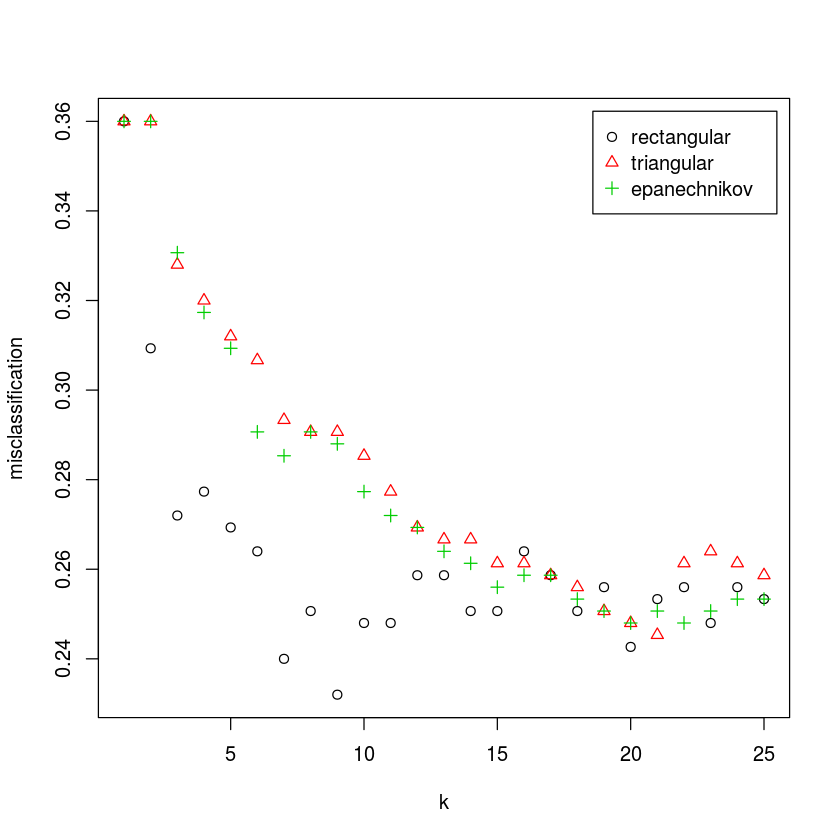

In [21]:
set.seed(7457)
kknn.train <- train.kknn(type ~ ., data = train, kmax = 25, 
                           distance = 2, 
                           kernel = c("rectangular", "triangular", "epanechnikov"))
plot(kknn.train)
kknn.train 


In [22]:
kknn.pred <- predict(kknn.train, newdata = test)
table(kknn.pred, test$type)


         
kknn.pred No Yes
      No  94  25
      Yes  9  29

In [23]:
linear.tune <- tune.svm(type ~ ., data = train,
                        kernel = "linear",
                        cost = c(0.001, 0.01, 0.1, 1, 5, 10))
summary(linear.tune)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.2188478 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.3274538 0.07002165
2 1e-02 0.2188478 0.04728651
3 1e-01 0.2216927 0.07342802
4 1e+00 0.2215505 0.06258194
5 5e+00 0.2189189 0.06601521
6 1e+01 0.2189189 0.06601521
